# **QUE 1**

In [1]:
# Predicting the diabetes disease

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path_to_csv = '/content/gdrive/My Drive/diabetes.csv'

In [3]:
import keras
import pandas
from keras.models import Sequential
from keras.layers import Dense, Activation

# load dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

dataset = pd.read_csv(path_to_csv, header=None).values

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))

Epoch 1/100
18/18 [==============================] - 1s 3ms/step - loss: 19.0087 - acc: 0.6146
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 13.2255 - acc: 0.5295
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 10.0118 - acc: 0.4931
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 7.0132 - acc: 0.4931
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 4.4223 - acc: 0.4774
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 3.0331 - acc: 0.5243
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 2.5237 - acc: 0.5434
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 2.2901 - acc: 0.5174
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 1.9465 - acc: 0.5573
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 1.7295 - acc: 0.5625
Epoch 11/100
18/18 [==============================] - 0s

# 1. a. Add more Dense layers to the existing code and check how the accuracy changes.

In [4]:
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer with input
my_first_nn.add(Dense(20, activation='relu')) # hidden layer
my_first_nn.add(Dense(20, activation='relu')) # hidden layer
my_first_nn.add(Dense(20, activation='relu')) # hidden layer
my_first_nn.add(Dense(20, activation='relu')) # hidden layer
my_first_nn.add(Dense(20, activation='relu')) # hidden layer

my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) # compilation
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,verbose=0, initial_epoch=0) # Training
print(my_first_nn.summary()) #Summary
print(my_first_nn.evaluate(X_test, Y_test)) #Evaluating

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                180       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dense_7 (Dense)             (None, 20)                420       
                                                                 
 dense_8 (Dense)             (None, 1)                

# 2. Change the data source to Breast Cancer dataset * available in the source code folder and make required changes. Report accuracy of the model.


In [6]:
path_to_csv = '/content/gdrive/My Drive/breastcancer.csv'

#Importing packages for creating arrays
import numpy as np
import pandas as pd

#Importing packages to convert Categorical data into Numerical
from sklearn.preprocessing import LabelEncoder

#Importing packages for splitting data
from sklearn.model_selection import train_test_split

#Importing packages for keras
from keras.models import Sequential
from keras.layers import Dense, Activation


#Loading the Dataset
dataset = pd.read_csv(path_to_csv, header=0)



In [7]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [8]:
#converting Categorical data into Numerical Using Label Encoding
le=LabelEncoder()
dataset['diagnosis'] = le.fit_transform(dataset['diagnosis'])


dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
#Splitting data into Feature Matrix & Label Matrix
X_train, X_test, Y_train, Y_test = train_test_split(dataset.iloc[:,2:32], dataset.iloc[:,1], test_size=0.25, random_state=87)


my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=30, activation='relu')) # hidden layer
my_first_nn.add(Dense(20, input_dim=30, activation='relu')) # hidden layer
my_first_nn.add(Dense(20, input_dim=30, activation='relu')) # hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) # compilation
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,verbose=0, initial_epoch=0) # Training
print(my_first_nn.summary()) #Summary
print(my_first_nn.evaluate(X_test, Y_test)) #Evaluating

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                620       
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 20)                420       
                                                                 
 dense_12 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1481 (5.79 KB)
Trainable params: 1481 (5.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
5/5 [==============================] - 0s 3ms/step - loss: 0.4521 - acc: 0.8182
[0.45214736461639404, 0.8181818127632141]


# 3. Normalize the data before feeding the data to the model and check how the normalization change your accuracy

In [10]:
#importing packages for Normalization
from sklearn.preprocessing import StandardScaler

In [11]:
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=30, activation='relu')) # hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) # compilation

sc = StandardScaler() #Create Model
X_train = sc.fit_transform(X_train) #Fit to data, then transform it.
X_test = sc.transform(X_test) # Perform standardization by centering and scaling

my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,verbose=0, initial_epoch=0) # Training
print(my_first_nn.summary()) #Summary
print(my_first_nn.evaluate(X_test, Y_test)) #Evaluating

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 20)                620       
                                                                 
 dense_14 (Dense)            (None, 1)                 21        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
5/5 [==============================] - 0s 3ms/step - loss: 0.1143 - acc: 0.9720
[0.11434684693813324, 0.9720279574394226]


# **QUE 2**

In [12]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))


11490434/11490434 [==============================] - 0s 0us/step
784


# 1. Plot the loss and accuracy for both training data and validation data using the history object in the source code.

In [13]:

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 10s 39ms/step - loss: 0.2902 - accuracy: 0.9098 - val_loss: 0.1245 - val_accuracy: 0.9618
Epoch 2/10
235/235 [==============================] - 10s 44ms/step - loss: 0.0992 - accuracy: 0.9692 - val_loss: 0.1077 - val_accuracy: 0.9653
Epoch 3/10
235/235 [==============================] - 8s 32ms/step - loss: 0.0638 - accuracy: 0.9804 - val_loss: 0.0846 - val_accuracy: 0.9735
Epoch 4/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0434 - accuracy: 0.9865 - val_loss: 0.0644 - val_accuracy: 0.9806
Epoch 5/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0316 - accuracy: 0.9899 - val_loss: 0.0711 - val_accuracy: 0.9788
Epoch 6/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0227 - accuracy: 0.9931 - val_loss: 0.0706 - val_accuracy: 0.9813
Epoch 7/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0170 - accuracy: 0.9947 - val_loss: 0.1487 - val_accuracy: 0.96

In [14]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

history.history.keys()

313/313 [==============================] - 2s 6ms/step - loss: 0.0692 - accuracy: 0.9838
Evaluation result on Test Data : Loss = 0.06919123232364655, accuracy = 0.9837999939918518


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

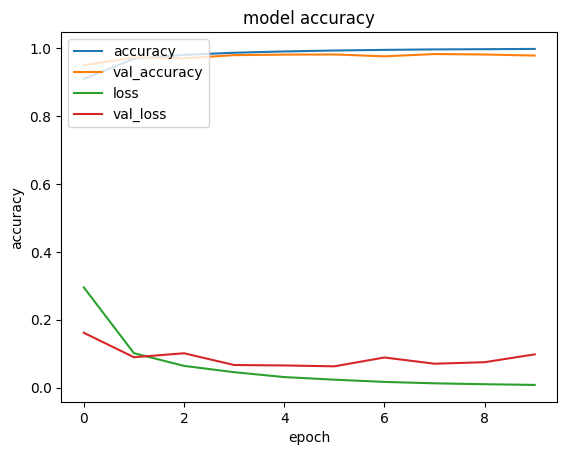

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'], loc='upper left')
plt.show()


# 2. Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.

1/1 [==============================] - 0s 231ms/step
predicted label: [[0.10515204 0.08642423 0.06644532 0.10861439 0.10271804 0.11496183
  0.09834136 0.07863227 0.11081728 0.12789321]]


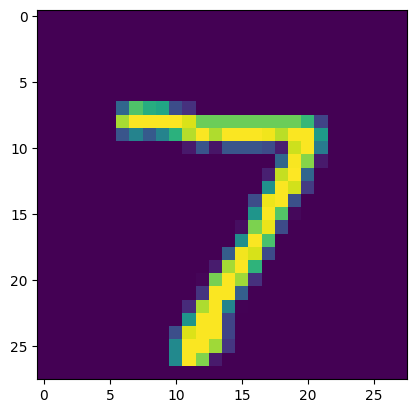

In [ ]:
plt.imshow(test_data[0].reshape(28,28))
print("predicted label:",model.predict(test_data[0].reshape(1,784)))

# 3. We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens.

In [ ]:
#increasing the number of hidden layers to 6
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss1, test_acc1] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data with 4 hidden layers: Loss = {}, accuracy = {}".format(test_loss1, test_acc1))



Epoch 1/10
235/235 [==============================] - 21s 85ms/step - loss: 3.1216 - accuracy: 0.8208 - val_loss: 0.2605 - val_accuracy: 0.9277
Epoch 2/10
235/235 [==============================] - 19s 83ms/step - loss: 0.1847 - accuracy: 0.9500 - val_loss: 0.1559 - val_accuracy: 0.9571
Epoch 3/10
235/235 [==============================] - 24s 100ms/step - loss: 0.1195 - accuracy: 0.9675 - val_loss: 0.1293 - val_accuracy: 0.9653
Epoch 4/10
235/235 [==============================] - 20s 83ms/step - loss: 0.0914 - accuracy: 0.9744 - val_loss: 0.1208 - val_accuracy: 0.9707
Epoch 5/10
235/235 [==============================] - 19s 83ms/step - loss: 0.0774 - accuracy: 0.9804 - val_loss: 0.1786 - val_accuracy: 0.9545
Epoch 6/10
235/235 [==============================] - 21s 90ms/step - loss: 0.0665 - accuracy: 0.9829 - val_loss: 0.1600 - val_accuracy: 0.9689
Epoch 7/10
235/235 [==============================] - 19s 83ms/step - loss: 0.0581 - accuracy: 0.9858 - val_loss: 0.1508 - val_accuracy

In [19]:
#All hidden layers with tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(612, activation='tanh'))
model.add(Dense(712, activation='tanh'))
model.add(Dense(812, activation='tanh'))
model.add(Dense(712, activation='tanh'))
model.add(Dense(812, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss2, test_acc2] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data with tanh activation: Loss = {}, accuracy = {}".format(test_loss2, test_acc3))


Epoch 1/10
235/235 [==============================] - 31s 128ms/step - loss: 0.8959 - accuracy: 0.7907 - val_loss: 0.3284 - val_accuracy: 0.9071
Epoch 2/10
235/235 [==============================] - 30s 126ms/step - loss: 0.2958 - accuracy: 0.9122 - val_loss: 0.3440 - val_accuracy: 0.8936
Epoch 3/10
235/235 [==============================] - 30s 129ms/step - loss: 0.2212 - accuracy: 0.9343 - val_loss: 0.2029 - val_accuracy: 0.9406
Epoch 4/10
235/235 [==============================] - 30s 126ms/step - loss: 0.1801 - accuracy: 0.9452 - val_loss: 0.1807 - val_accuracy: 0.9454
Epoch 5/10
235/235 [==============================] - 29s 125ms/step - loss: 0.1542 - accuracy: 0.9531 - val_loss: 0.3942 - val_accuracy: 0.8811
Epoch 6/10
235/235 [==============================] - 29s 126ms/step - loss: 0.1388 - accuracy: 0.9574 - val_loss: 0.4034 - val_accuracy: 0.8879
Epoch 7/10
235/235 [==============================] - 30s 128ms/step - loss: 0.1278 - accuracy: 0.9609 - val_loss: 0.1403 - val_ac

# 4. Run the same code without scaling the images and check the performance?

In [20]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
# print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss3, test_acc3] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data without scaling: Loss = {}, accuracy = {}".format(test_loss3, test_acc3))



(28, 28)
Epoch 1/10
235/235 [==============================] - 11s 45ms/step - loss: 8.0447 - accuracy: 0.8668 - val_loss: 0.7363 - val_accuracy: 0.9180
Epoch 2/10
235/235 [==============================] - 8s 32ms/step - loss: 0.4084 - accuracy: 0.9456 - val_loss: 0.3687 - val_accuracy: 0.9439
Epoch 3/10
235/235 [==============================] - 6s 26ms/step - loss: 0.2412 - accuracy: 0.9595 - val_loss: 0.3436 - val_accuracy: 0.9450
Epoch 4/10
235/235 [==============================] - 8s 35ms/step - loss: 0.1952 - accuracy: 0.9671 - val_loss: 0.3727 - val_accuracy: 0.9412
Epoch 5/10
235/235 [==============================] - 6s 26ms/step - loss: 0.1718 - accuracy: 0.9715 - val_loss: 0.2716 - val_accuracy: 0.9586
Epoch 6/10
235/235 [==============================] - 8s 35ms/step - loss: 0.1551 - accuracy: 0.9744 - val_loss: 0.2766 - val_accuracy: 0.9611
Epoch 7/10
235/235 [==============================] - 6s 27ms/step - loss: 0.1363 - accuracy: 0.9781 - val_loss: 0.3401 - val_accura